In [1]:
# Import Packages
from utils import *
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import SCORERS
import matplotlib.pyplot as plt

Loading BokehJS ...

In [2]:
harpazomopdf = loadharpazdata('vectors/2012_OMOPquery_subset.txt','queries/OMOPlabsandqueries.txt', 'vectors/OMOPdispro.txt')
harpazomopdf.head()

,Query,Label,EBGM,EB05,PRR,PRR05,ROR,ROR05,EBGMNoStrat,EB05NoStrat,...,7991,7992,7993,7994,7995,7996,7997,7998,7999,8000
0,"S(penicillin_v)*S(liver_failure,_acute)",0,1.66,1.47,1.80,1.60,1.83,1.62,1.79,1.59,...,0,0,0,0,0,0,1,0,0,0
1,S(stavudine)*S(gastrointestinal_hemorrhage),0,1.33,1.20,1.45,1.31,1.46,1.32,1.45,1.30,...,1,0,0,1,1,0,0,0,0,0
2,S(tipranavir)*S(acute_myocardial_infarction),0,0.83,0.49,1.36,0.79,1.36,0.79,1.30,0.75,...,0,1,0,0,1,0,0,0,0,0
3,S(prochlorperazine)*S(acute_kidney_insufficiency),0,2.35,2.16,2.91,2.68,2.96,2.72,2.88,2.65,...,1,1,0,0,0,0,1,0,0,1
4,S(phentolamine)*S(acute_kidney_insufficiency),0,NA,NA,NA,NA,NA,NA,NA,NA,...,1,0,0,0,1,0,0,0,0,1


In [3]:
bandaeuadrdf = loadbandadata('vectors/2012_euadrquery_subset.txt','queries/euadrreflabsandqueries.txt','vectors/euadrdispro.txt')
bandaeuadrdf.drop('CaseReports', axis=1, inplace=True) #drop case reports, as they're not a ratio
bandaeuadrdf.head()

,Query,Label,PRR,PRRUB,PRRLB,ROR,RORUB,RORLB,1,2,...,7991,7992,7993,7994,7995,7996,7997,7998,7999,8000
0,S(allopurinol)*S(aplastic_anemia),1,2.60533,3.33871,2.03305,2.60581,3.33956,2.03328,1,1,...,1,1,0,0,1,0,0,0,0,0
1,S(methotrexate)*S(diseases_of_mitral_valve),0,0.47329,0.77319,0.28971,0.47327,0.77317,0.28969,1,0,...,1,1,0,1,0,0,0,0,0,0
2,S(ciprofloxacin)*S(acute_kidney_insufficiency),1,0.95072,1.32475,0.68229,0.95071,1.32482,0.68224,1,0,...,1,0,0,0,0,0,0,0,0,1
3,S(carbamazepine)*S(erythema_multiforme),1,4.07133,4.87622,3.39930,4.07407,4.88027,3.40104,1,0,...,1,1,0,0,0,0,0,0,1,1
4,S(ferrous_sulfate)*S(acute_myocardial_infarction),0,1.14265,1.39724,0.93445,1.14281,1.39774,0.93437,1,1,...,0,0,0,1,0,1,0,1,0,1


In [4]:
nona = harpazomopdf[harpazomopdf.PRR != "NA"]
clean = nona[nona.PRR != '0.0']
clean.shape

(380, 8010)

In [5]:
nonaeuadr = bandaeuadrdf[bandaeuadrdf.PRR != "NA"]
cleaneuadr = nonaeuadr[nonaeuadr.PRR != '0.0']
cleaneuadr.shape

(91, 8008)

In [6]:
print(f'Available scoring metrics: {SCORERS.keys()}') # names of possible scoring metrics; roc_auc is used in this work
plt.rcParams.update({'font.size': 17}) #update font size for plots
print(f"Font size is: {plt.rcParams['font.size']}")

Available scoring metrics: dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])
Font size is: 17.0


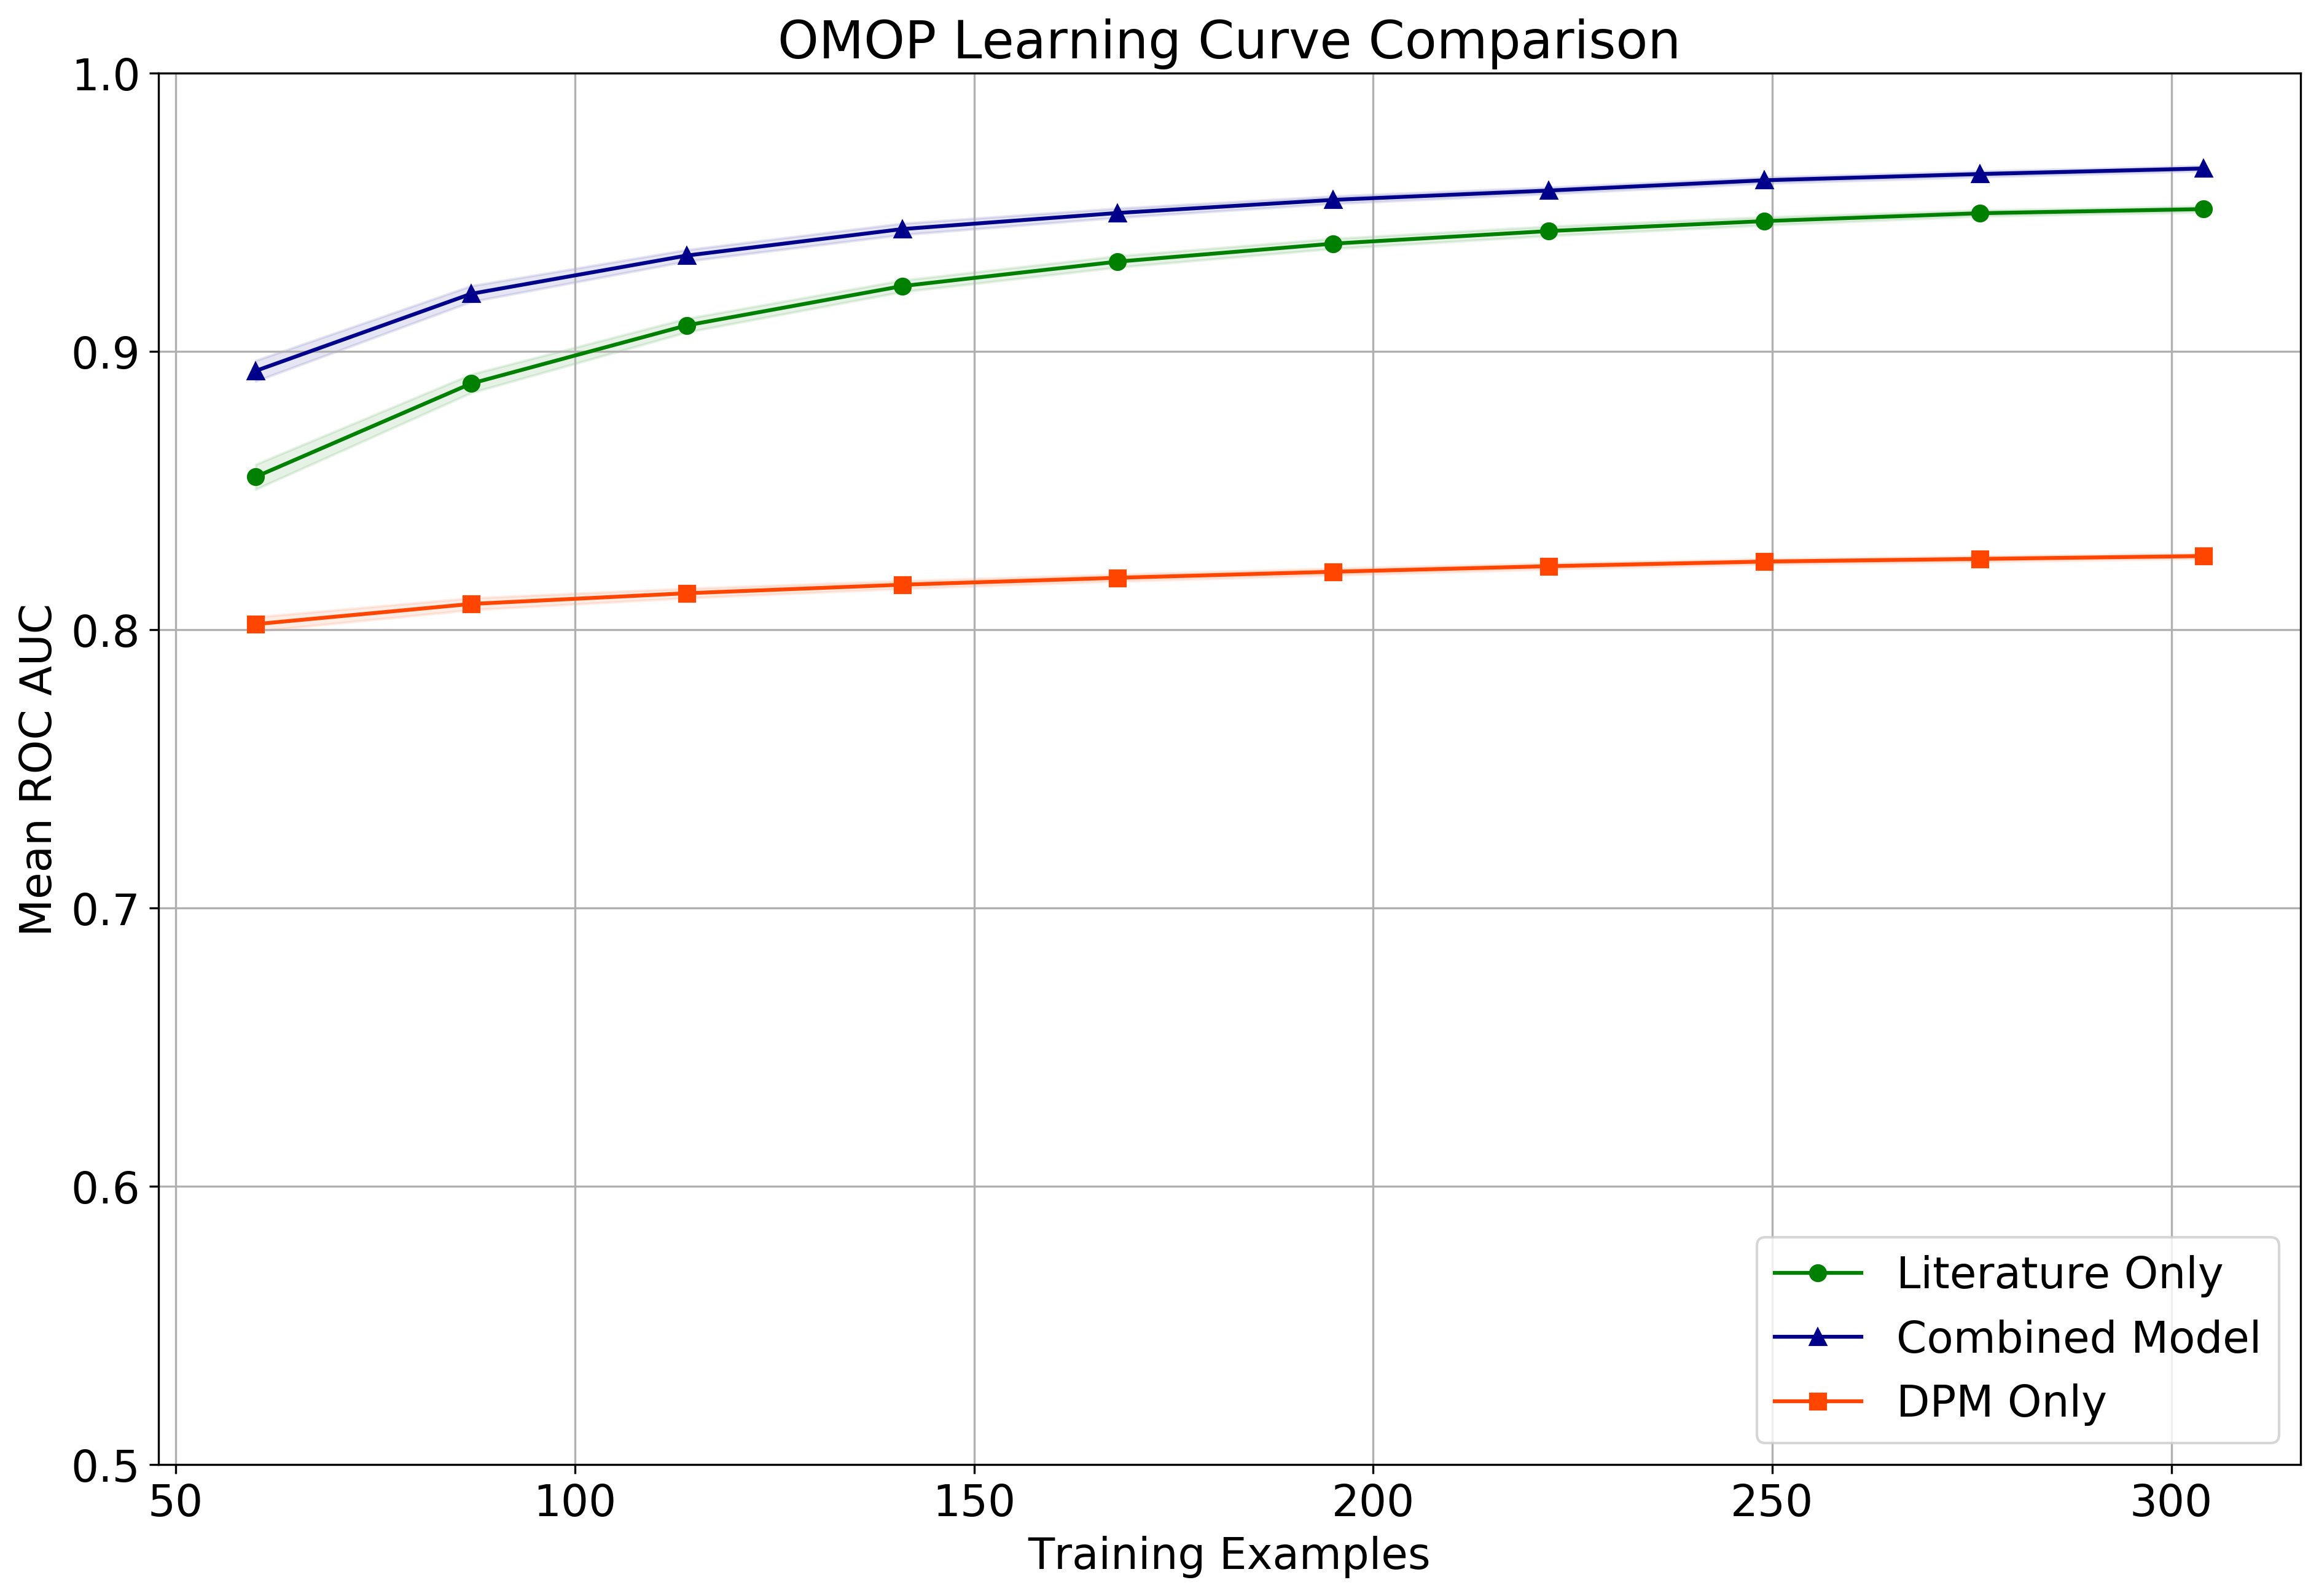

In [7]:
omop_plot = plot_shuffle_triple_comparison_learning_curve(LogisticRegression(penalty='l1', solver='liblinear'), 'OMOP Learning Curve Comparison',
                                     np.asarray(clean.iloc[:,10:]), np.asarray(clean.Label), np.asarray(clean.iloc[:,2:]), np.asarray(clean.Label),
                                     np.asarray(clean.iloc[:,2:10]), np.asarray(clean.Label), cv=StratifiedKFold(n_splits=5, shuffle=True), ylim=[0.5,1.0],
                                     label1='Literature Only', label2='Combined Model', label3='DPM Only', score='roc_auc', train_sizes=np.linspace(0.2,1,10))

In [ ]:
omop_plot #if previous cell doesn't output plot on account of closing the notebook before the computation is finished etc.

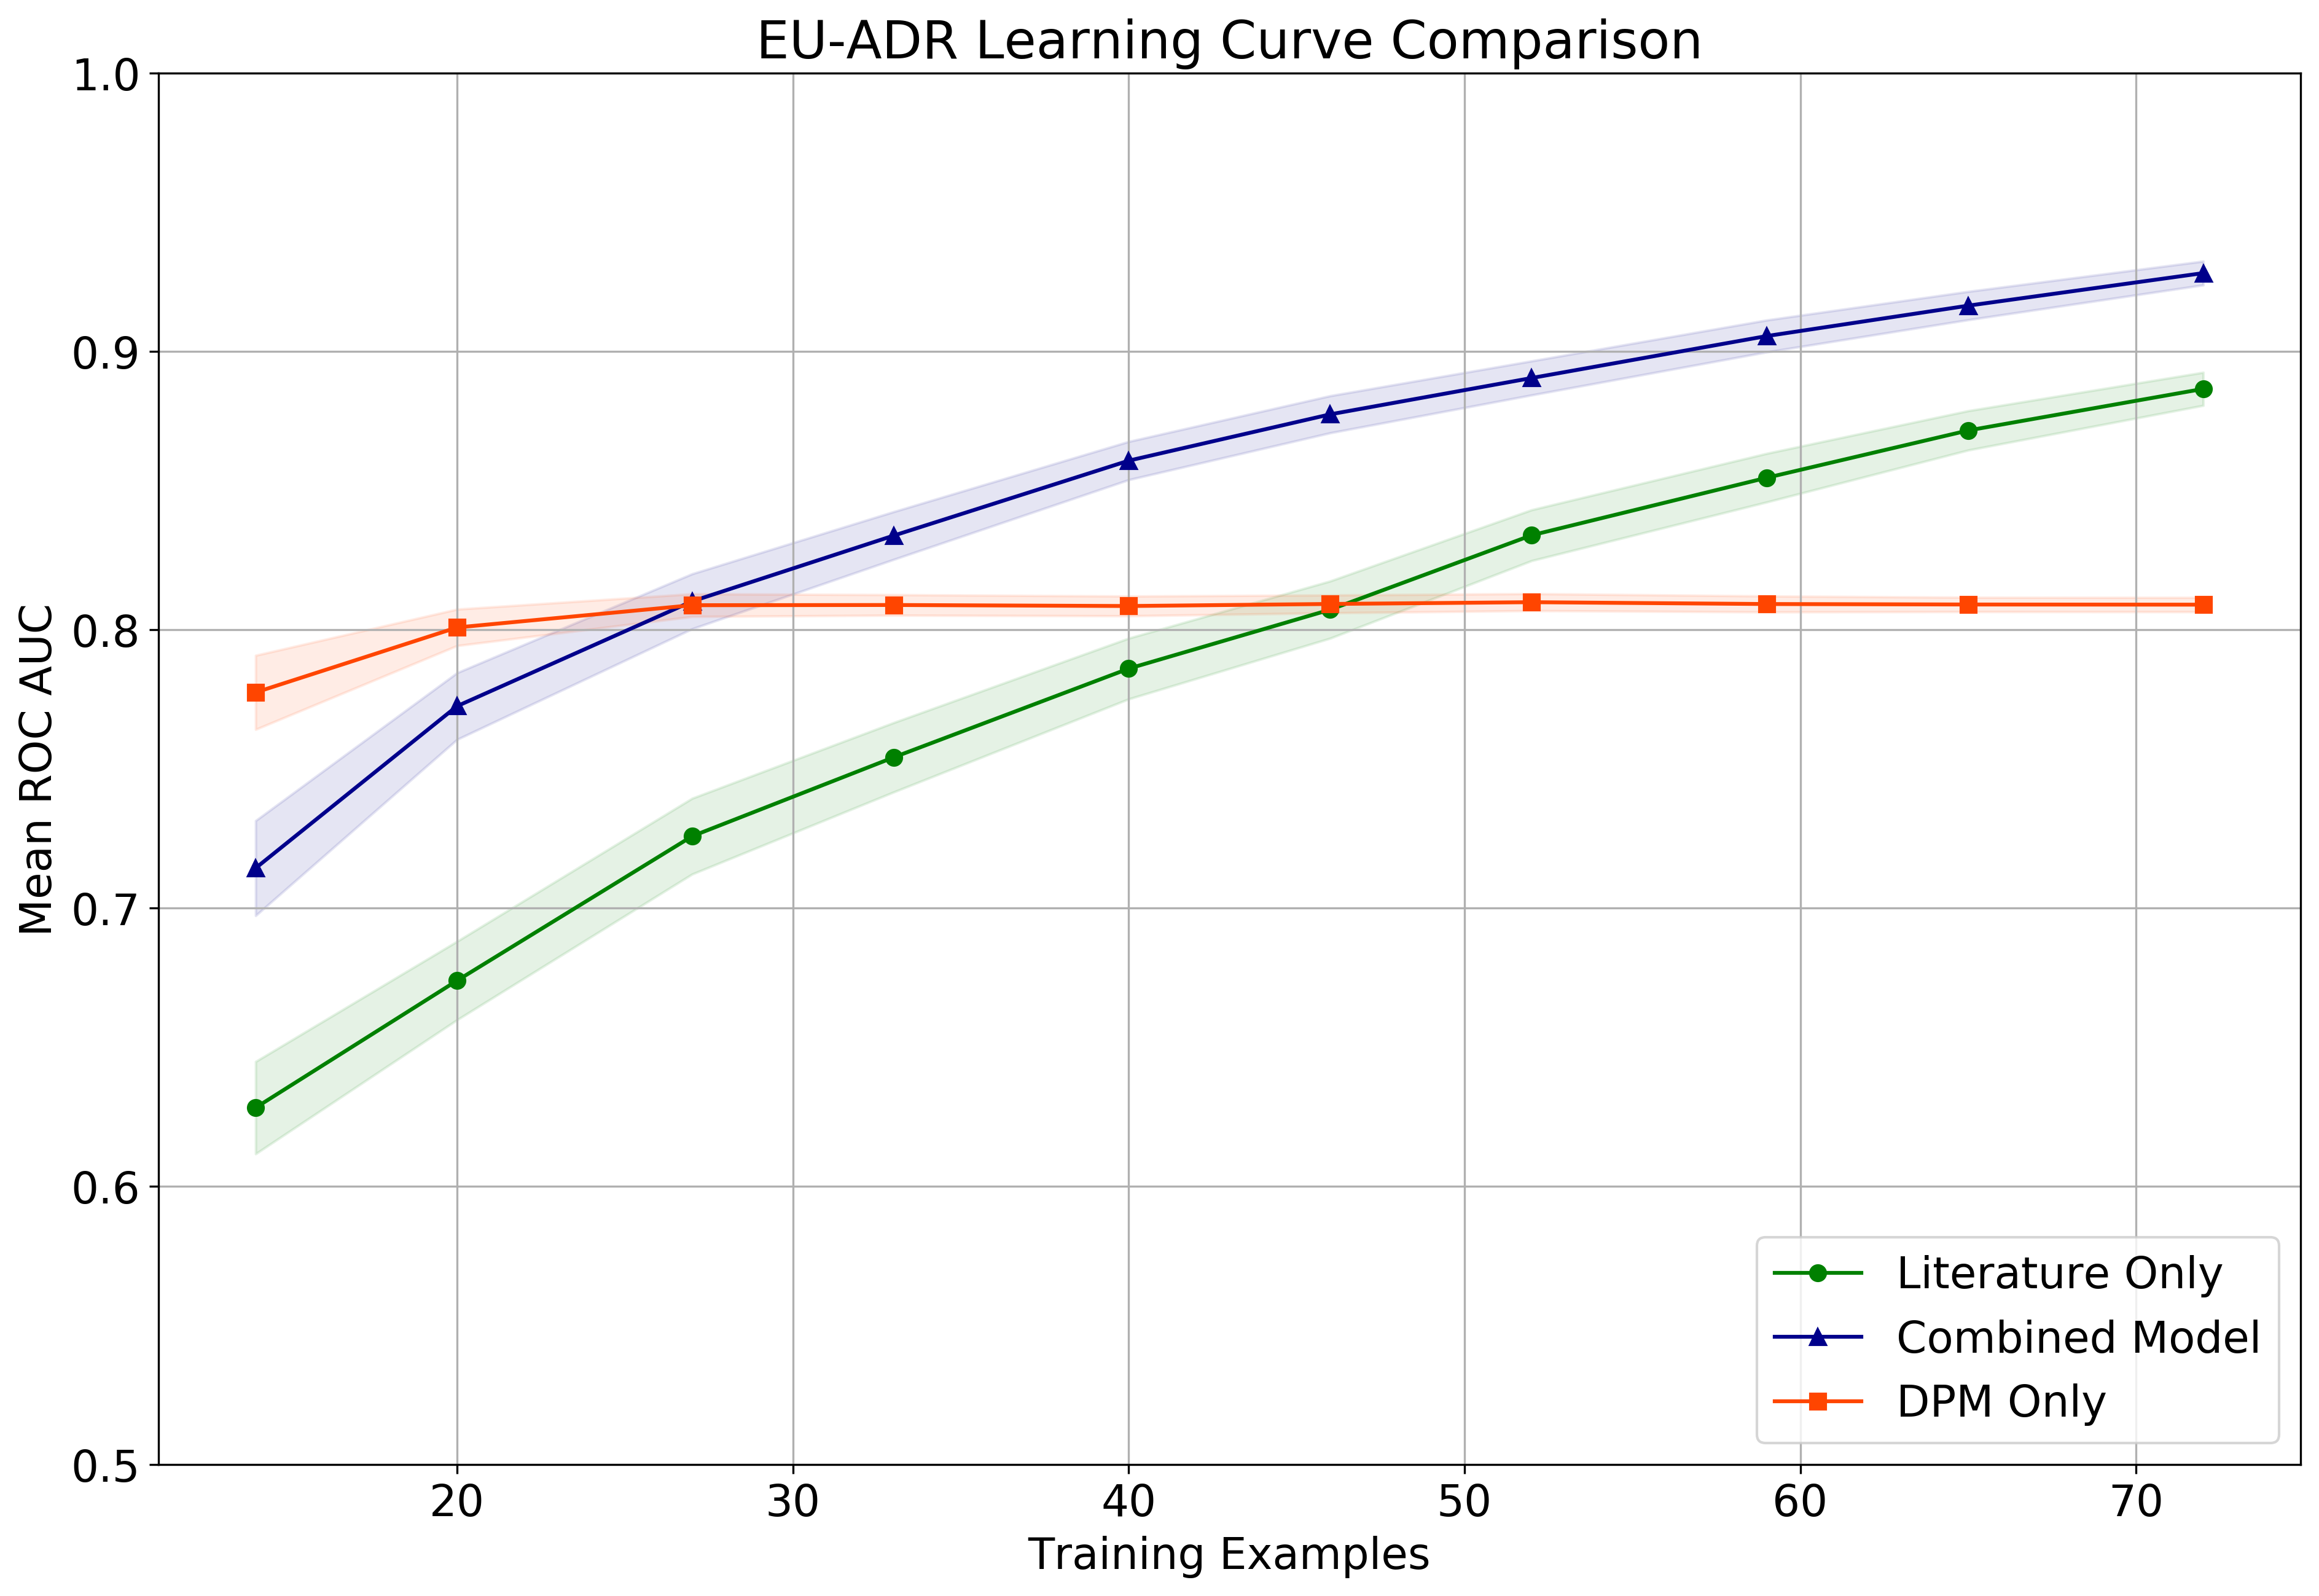

In [8]:
euadr_plot = plot_shuffle_triple_comparison_learning_curve(LogisticRegression(penalty='l1', solver='liblinear'), 'EU-ADR Learning Curve Comparison',
                                     np.asarray(cleaneuadr.iloc[:,8:]), np.asarray(cleaneuadr.Label), np.asarray(cleaneuadr.iloc[:,2:]), np.asarray(cleaneuadr.Label),
                                     np.asarray(cleaneuadr.iloc[:,2:8]), np.asarray(cleaneuadr.Label), cv=StratifiedKFold(n_splits=5, shuffle=True), ylim=[0.5,1.0],
                                     label1='Literature Only', label2='Combined Model', label3='DPM Only', score='roc_auc', train_sizes=np.linspace(.2,1,10))

In [ ]:
euadr_plot #if previous cell doesn't output plot on account of closing the notebook before the computation is finished etc.

<module 'matplotlib.pyplot' from '/home/justin/miniconda/envs/lab/lib/python3.7/site-packages/matplotlib/pyplot.py'>

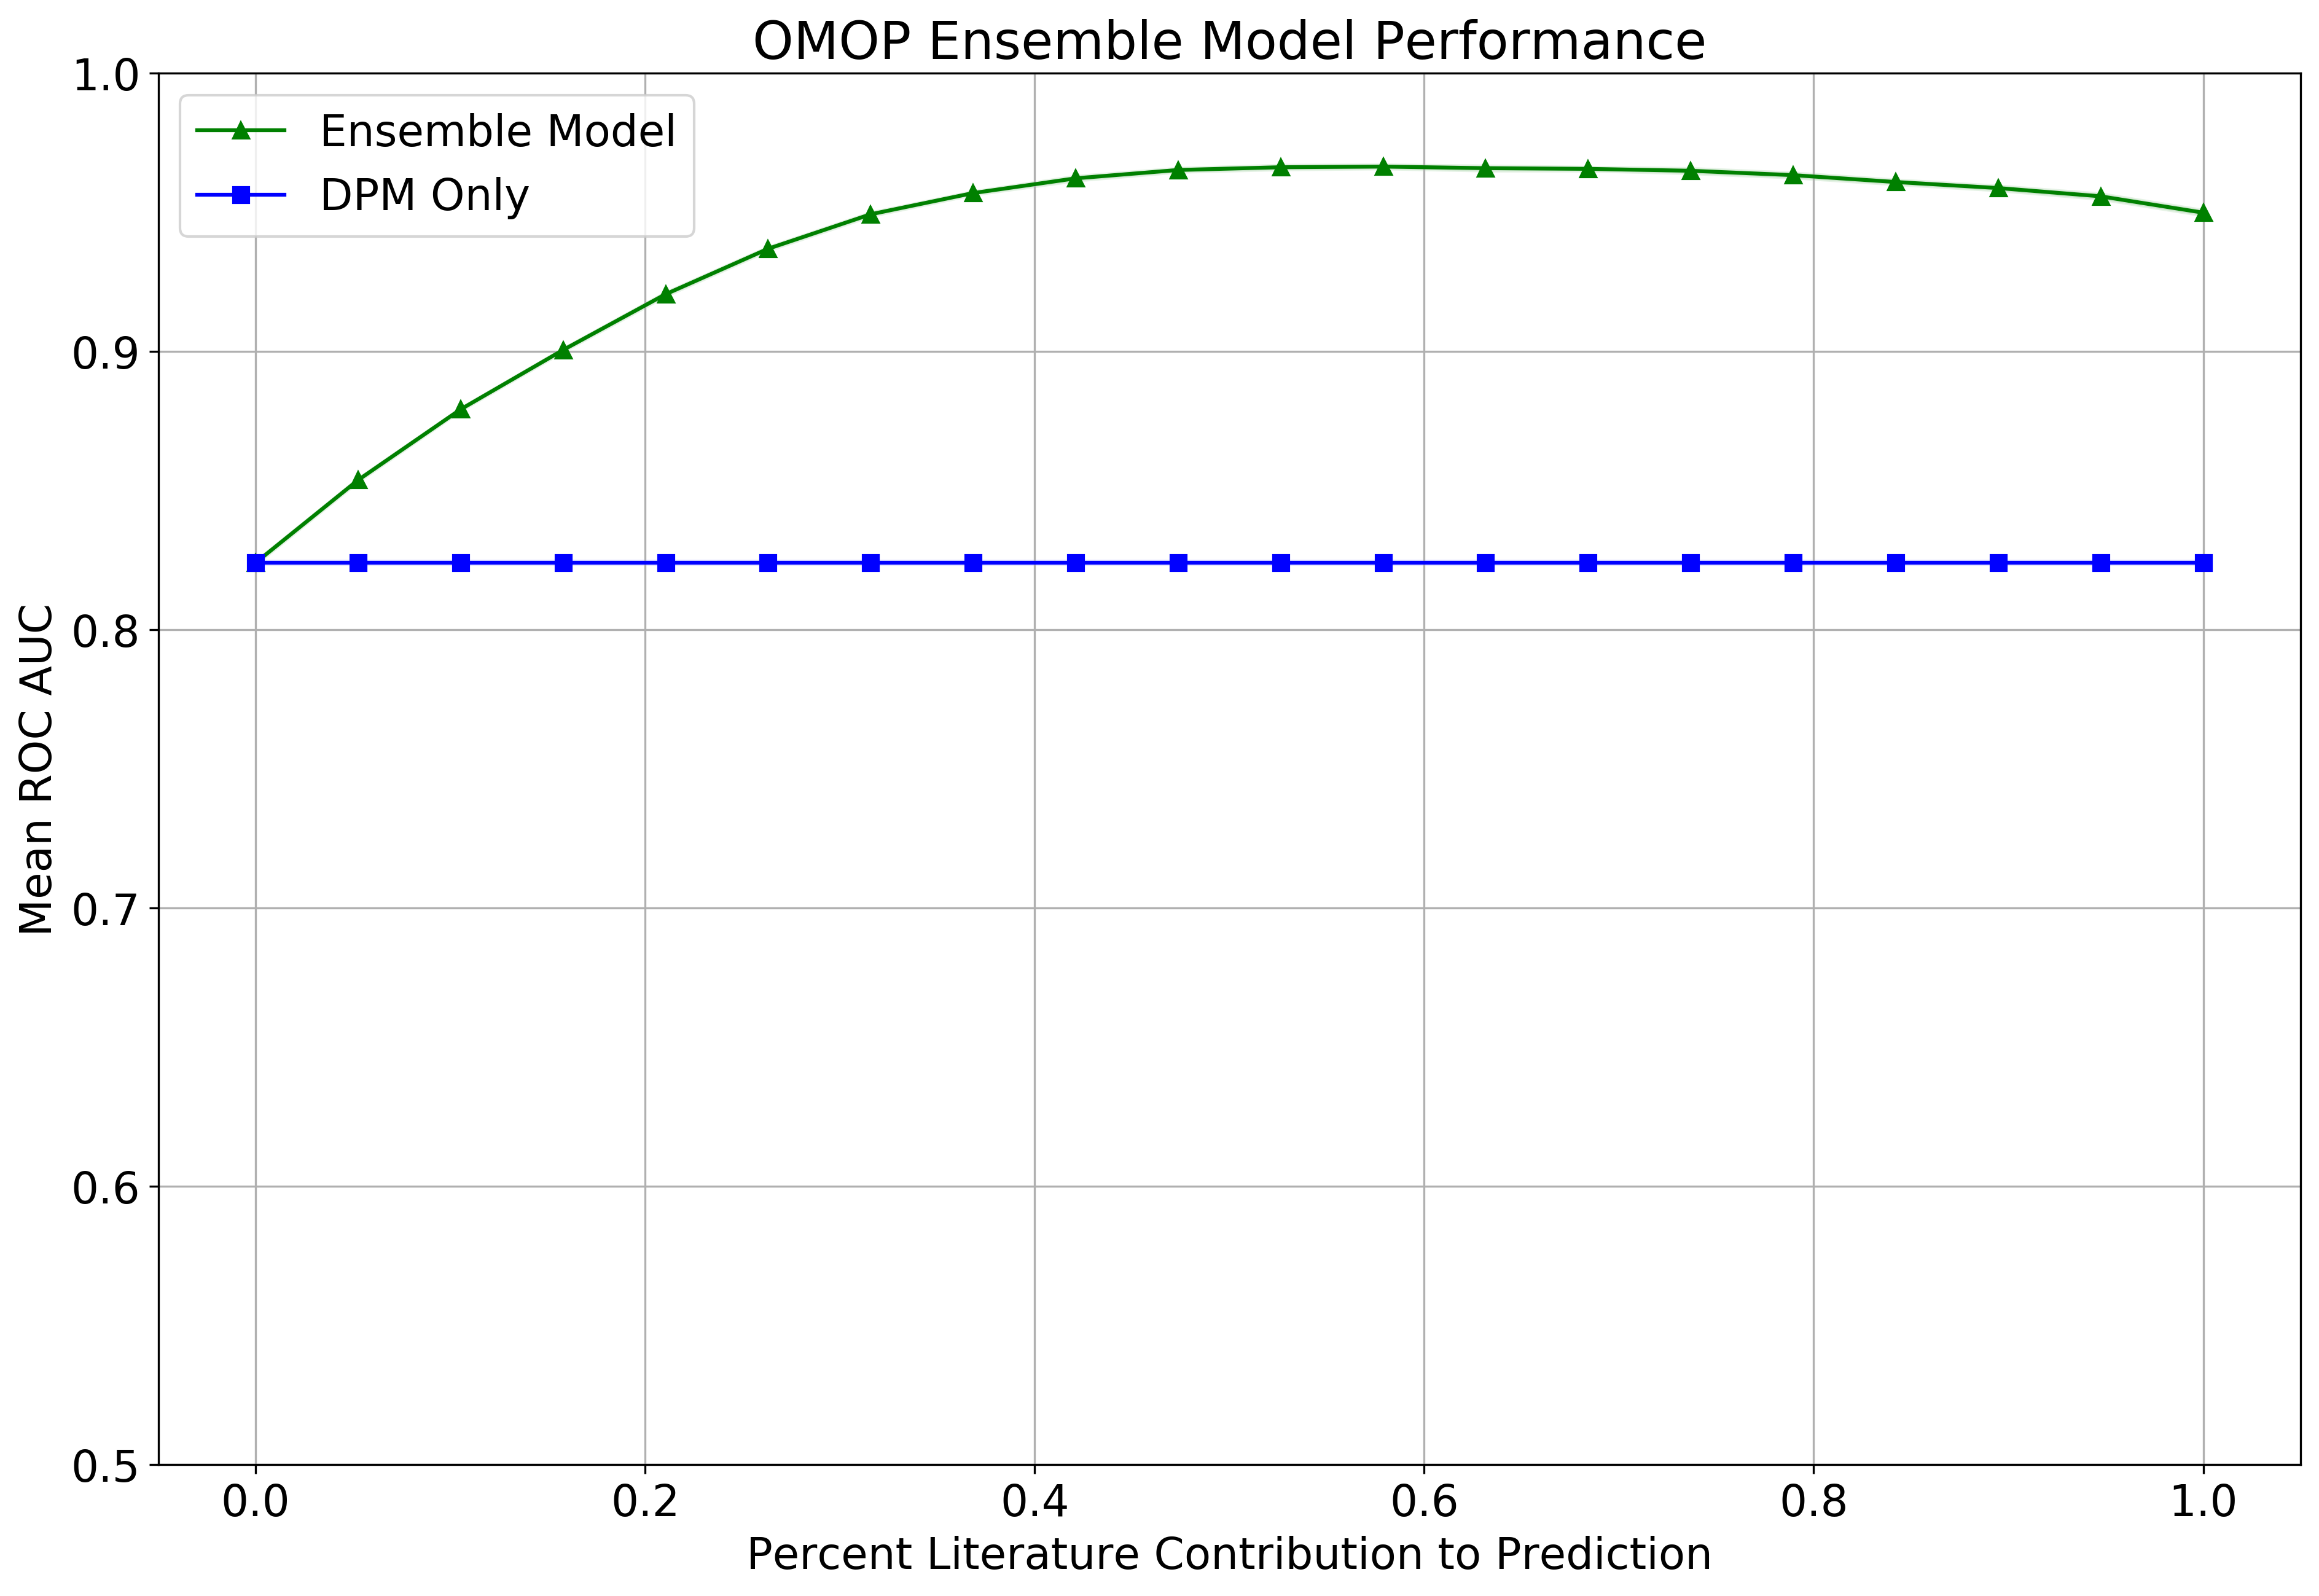

In [9]:
plot_ensemble(clean, 10, title='OMOP Ensemble Model Performance')

<module 'matplotlib.pyplot' from '/home/justin/miniconda/envs/lab/lib/python3.7/site-packages/matplotlib/pyplot.py'>

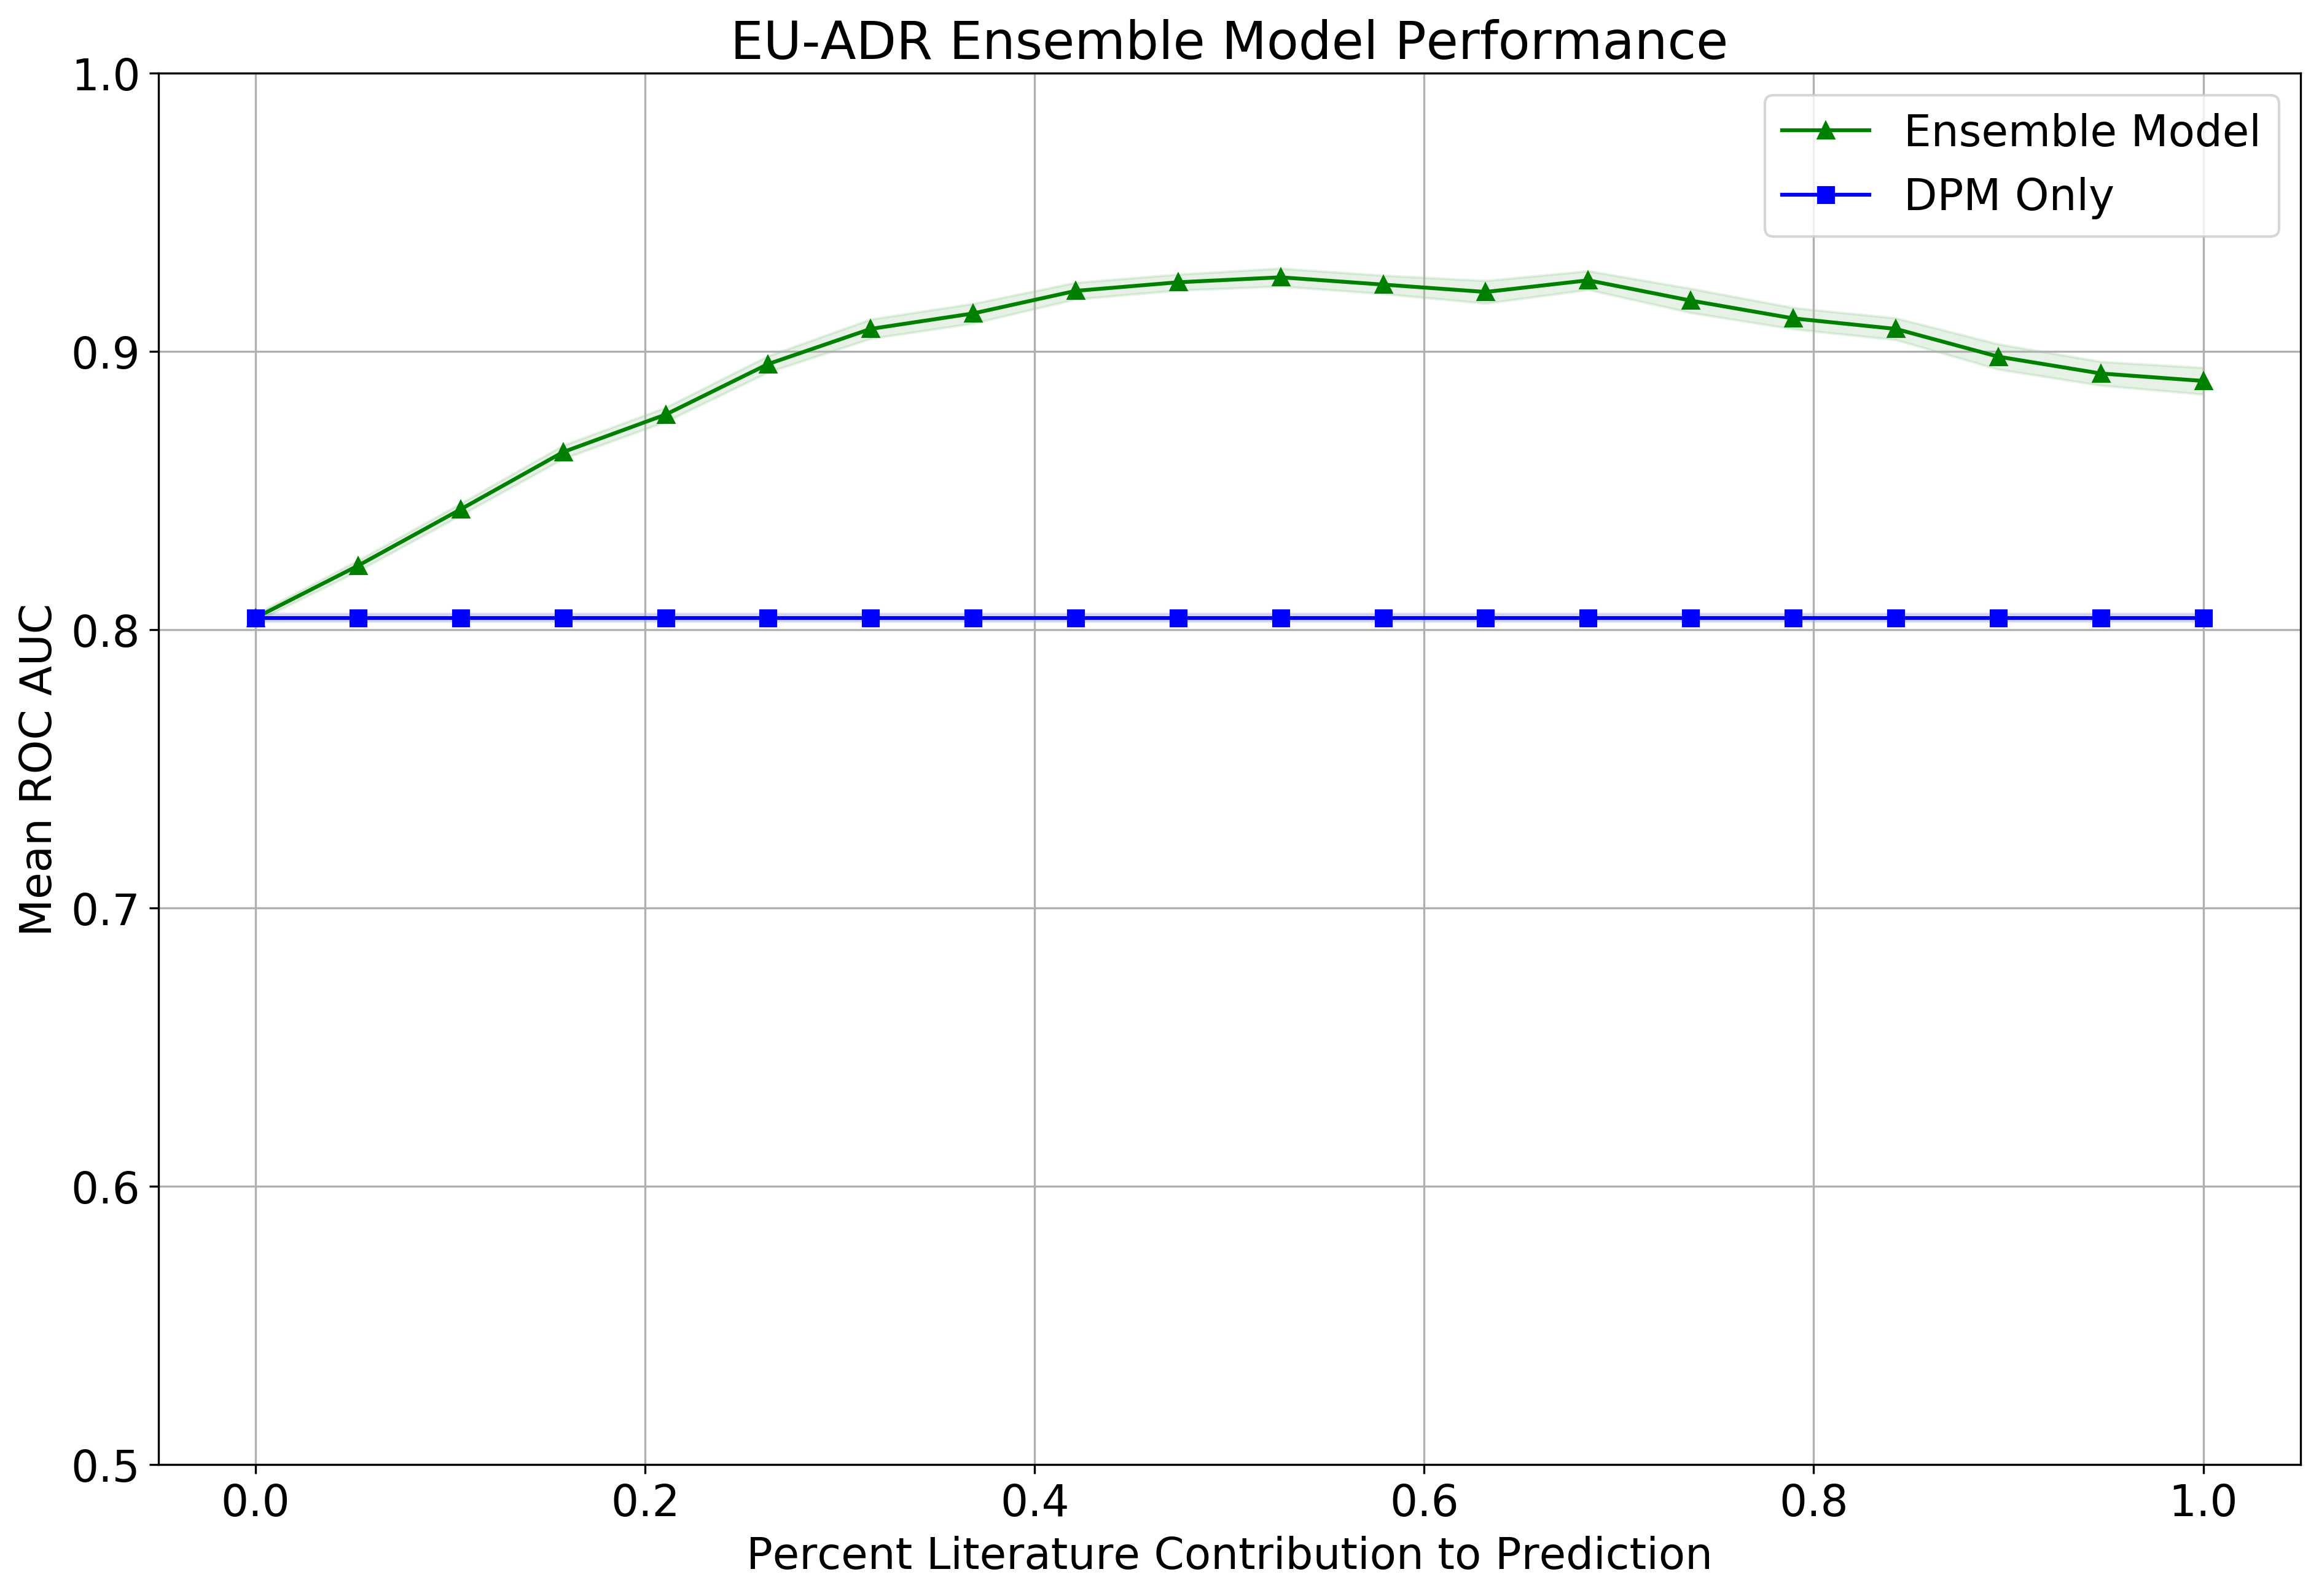

In [10]:
plot_ensemble(cleaneuadr, 8, title='EU-ADR Ensemble Model Performance')